In [7]:
import  pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


In [8]:
df= {
    'age': [33, 44, 22, 44, 55],
    'height': [5.5, 6.0, 5.4, 5.9, 6.2],
    'weight': [150, 160, 140, 160, 170]
    
}
df = pd.DataFrame(df)
print(df)

   age  height  weight
0   33     5.5     150
1   44     6.0     160
2   22     5.4     140
3   44     5.9     160
4   55     6.2     170


In [6]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-0.588348,-0.989071,-0.588348
1,0.392232,0.659380,0.392232
2,-1.568929,-1.318761,-1.568929
3,0.392232,0.329690,0.392232
4,1.372813,1.318761,1.372813


## minmax scaler

In [9]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.333333,0.125,0.333333
1,0.666667,0.750,0.666667
2,0.000000,0.000,0.000000
3,0.666667,0.625,0.666667
4,1.000000,1.000,1.000000


## max absoulute sclaer

In [10]:
scaler = MaxAbsScaler()
scaled = scaler.fit_transform(df)
scaled
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.6,0.887097,0.882353
1,0.8,0.967742,0.941176
2,0.4,0.870968,0.823529
3,0.8,0.951613,0.941176
4,1.0,1.000000,1.000000


## robust scaler

In [11]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled = scaler.fit_transform(df)
scaled
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.0,-0.8,-1.0
1,0.0,0.2,0.0
2,-2.0,-1.0,-2.0
3,0.0,0.0,0.0
4,1.0,0.6,1.0


## Transformation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   


In [4]:
np.random.seed(0)
df = np.random.exponential(scale=1.0, size=1000)
df = pd.DataFrame(df, columns=['value'])
df.head()

df.shape


(1000, 1)

<Axes: xlabel='value', ylabel='Count'>

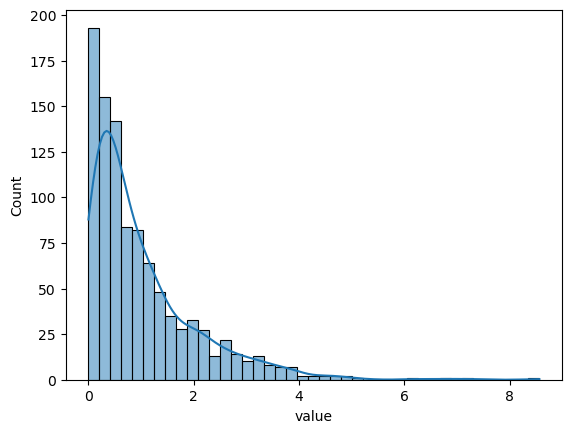

In [5]:
sns.histplot(df['value'], kde=True)

In [9]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_box_cox = PowerTransformer(method='box-cox') 
# for box cox data must be positive.

pt_yeo_johnson = PowerTransformer(method='yeo-johnson')
pt_normal = QuantileTransformer(output_distribution='normal')
df['box_cox'] = pt_box_cox.fit_transform(df[['value']] + 1)
df['yeo_johnson'] = pt_yeo_johnson.fit_transform(df[['value']])
df['Quantile'] = pt_normal.fit_transform(df[['value']])
df.head()

,value,box_cox,yeo_johnson,Quantile
0,0.795875,0.163651,0.163651,0.162552
1,1.255931,0.685783,0.685783,0.587964
2,0.923223,0.331474,0.331474,0.286135
3,0.787201,0.151411,0.151411,0.157469
4,0.551048,-0.230634,-0.230634,-0.154930


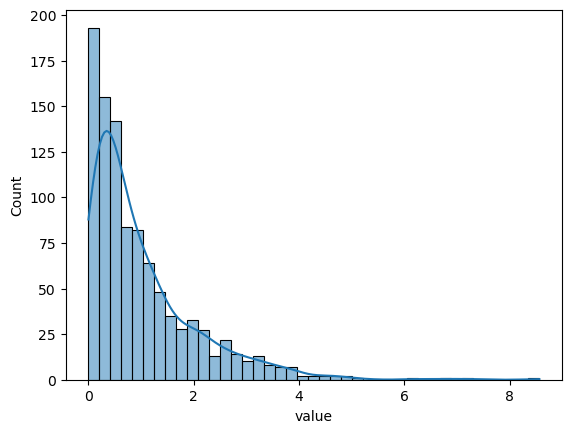

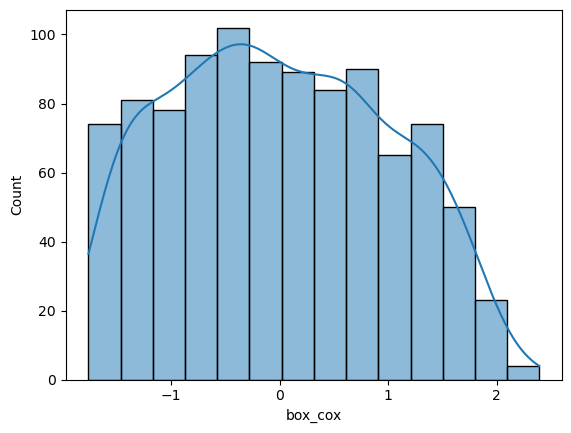

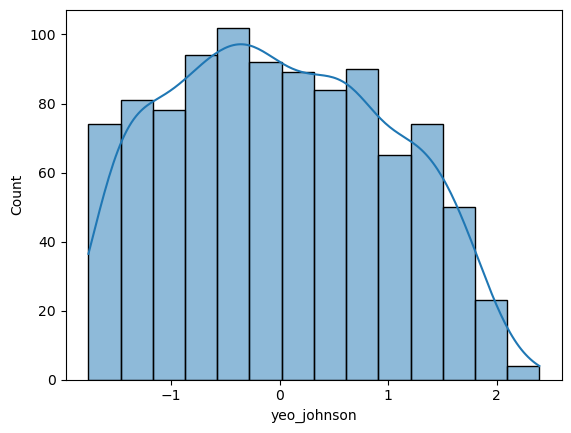

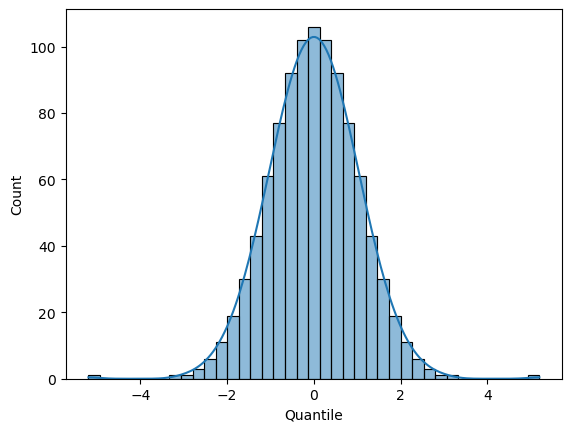

In [10]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

_____

## Normalization


## l2 noramlization

In [ ]:
from sklearn.preprocessing import Normalizer
data = [[4, 1, 2, 2],
        [1, 3, 0, 3],
        [5, 7, 5, 0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))


[[0.44444444 0.11111111 0.22222222 0.22222222]
 [0.14285714 0.42857143 0.         0.42857143]
 [0.29411765 0.41176471 0.29411765 0.        ]]


## l1 normalization

In [21]:
from sklearn.preprocessing import Normalizer
data = [[4, 1, 2, 2],
        [1, 3, 0, 3],
        [5, 7, 5, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))


[[0.44444444 0.11111111 0.22222222 0.22222222]
 [0.14285714 0.42857143 0.         0.42857143]
 [0.29411765 0.41176471 0.29411765 0.        ]]


## z-score normalization
    1. StandardScaler
 1. MinMax normalization
 2. Min max scaler

In [22]:
# log transformation
import pandas as pd
import numpy as np

df = {
    'values':[1,5,30,100,1000,22,35,67,789,55]
}
df = pd.DataFrame(df)
df

,values
0,1
1,5
2,30
3,100
4,1000
5,22
6,35
7,67
8,789
9,55


<Axes: xlabel='values', ylabel='Count'>

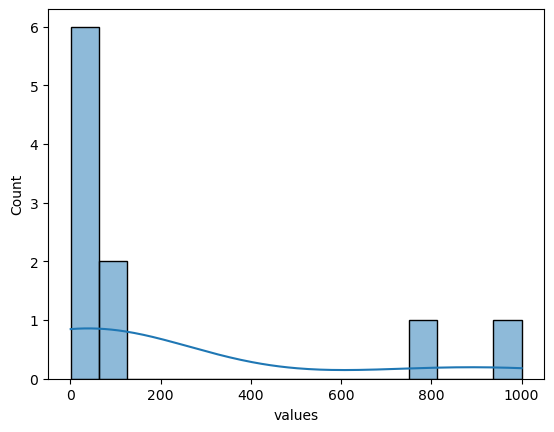

In [23]:
sns.histplot(df['values'], kde = True)

In [24]:
df['log_values'] = np.log(df['values'])
df

,values,log_values
0,1,0.000000
1,5,1.609438
2,30,3.401197
3,100,4.605170
4,1000,6.907755
5,22,3.091042
6,35,3.555348
7,67,4.204693
8,789,6.670766
9,55,4.007333


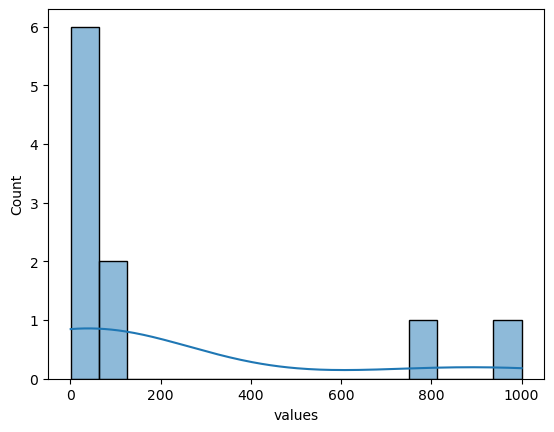

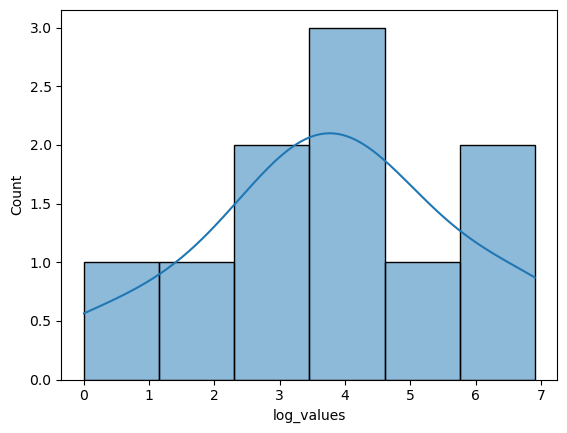

In [25]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()